In [2]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

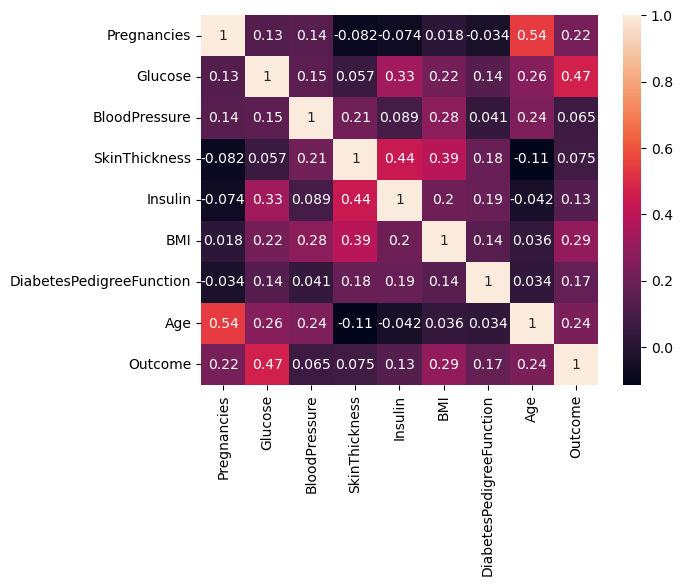

In [3]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [4]:
df.isnull().sum()
#No missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Check for non-numeric or NaN values
print(df['Pregnancies'].apply(lambda x: isinstance(x, (int, float))).all())  # Should return True
print(df['Pregnancies'].isnull().sum())  # Should return 0 for no missing values


True
0


In [7]:
print(df['DiabetesPedigreeFunction'].apply(lambda x:isinstance(x,(float,int))).all())
print(df['DiabetesPedigreeFunction'].isnull().sum())

True
0


In [8]:
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].astype(int)

In [9]:
print(df['BMI'].apply(lambda x:isinstance(float,int)).all())
print(df['BMI'].isnull().sum())

False
0


In [10]:
df['BMI']=pd.to_numeric(df['BMI'],errors='coerce')

In [11]:
df['BMI']=df['BMI'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int32
 6   DiabetesPedigreeFunction  768 non-null    int32
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int32(2), int64(7)
memory usage: 48.1 KB


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df.iloc[:,:-1]
y=df['Outcome']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
classifier=DecisionTreeClassifier(criterion='entropy')

In [27]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
727,0,141,84,26,0,32,0,22
423,2,115,64,22,0,30,0,21
179,5,130,82,0,0,39,0,37
304,3,150,76,0,0,21,0,37
398,3,82,70,0,0,21,0,25


[Text(0.5961538461538461, 0.9166666666666666, 'x[1] <= 154.5\nentropy = 0.942\nsamples = 384\nvalue = [246, 138]'),
 Text(0.3076923076923077, 0.75, 'x[5] <= 26.5\nentropy = 0.843\nsamples = 325\nvalue = [237, 88]'),
 Text(0.07692307692307693, 0.5833333333333334, 'x[1] <= 104.5\nentropy = 0.274\nsamples = 85\nvalue = [81, 4]'),
 Text(0.038461538461538464, 0.4166666666666667, 'entropy = 0.0\nsamples = 46\nvalue = [46, 0]'),
 Text(0.11538461538461539, 0.4166666666666667, 'x[1] <= 107.5\nentropy = 0.477\nsamples = 39\nvalue = [35, 4]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.15384615384615385, 0.25, 'x[1] <= 127.0\nentropy = 0.303\nsamples = 37\nvalue = [35, 2]'),
 Text(0.11538461538461539, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.19230769230769232, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.5384615384615384, 0.5833333333333334, 'x[7] <= 28.5\nentropy = 0.934\nsamples = 240\nvalue = [156, 84]'),
 Text(0.38461538461538464, 0.4166666

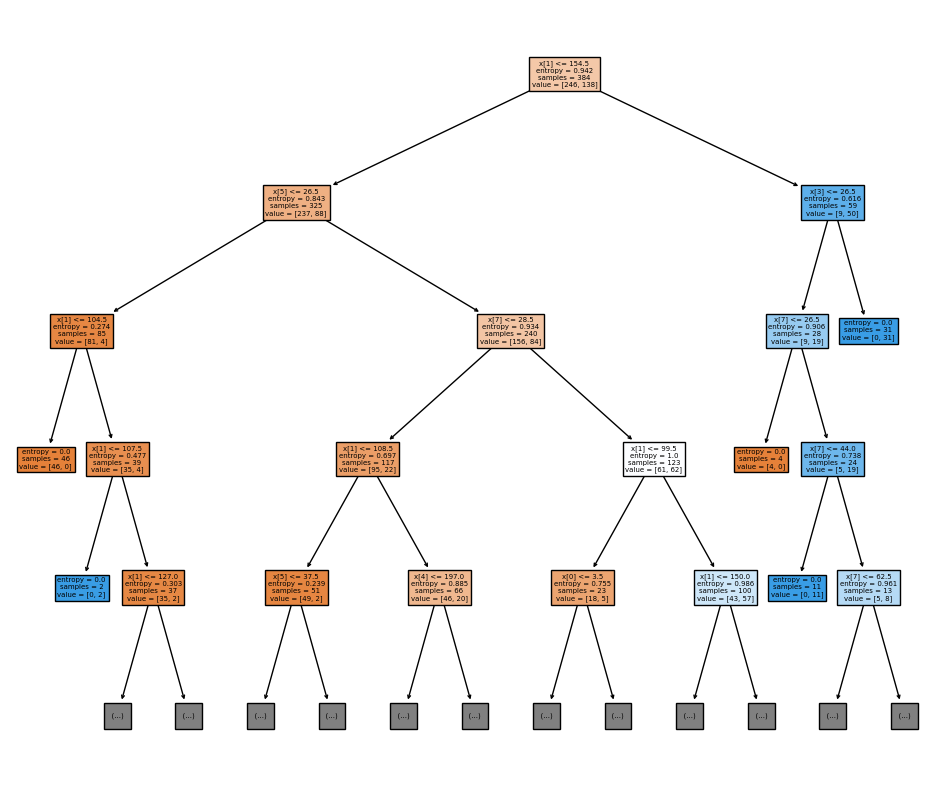

In [35]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=[12,10])
tree.plot_tree(classifier,filled=True,max_depth=4)

In [30]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,

In [33]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.7005208333333334
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       241
           1       0.61      0.55      0.58       143

    accuracy                           0.70       384
   macro avg       0.68      0.67      0.67       384
weighted avg       0.70      0.70      0.70       384



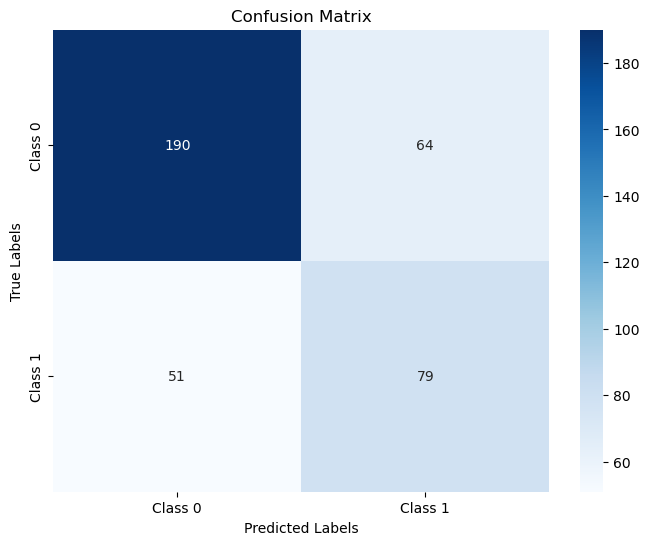

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assume y_true (actual labels) and y_pred (predicted labels) are available
cm = confusion_matrix(y_test, y_pred)

# Visualization with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
From the plot we see that the glucose feature has been chosen since it has maximum information gain.

In [ ]:
Other features include BMI,Age.For Glucose we see that the threshold is 154, for BMI it is 26.5.So to even think logically we see that people with high glucose,low BMI and high age are more prone to diabetes.
Since they dominate the higher levels of the  tree we see they hold more importance.